In this example we compare MINRES and CG on some pseudorandom SPD problems.  The first matrix has a condition number of 100. 

In [1]:
using SparseArrays
include("../FNC.jl")

n = 2000
density = 0.005
A = FNC.sprandsym(n,density,1e-2)
@show nnz(A);

nnz(A) = 20006


We cook up a linear system whose solution we happen to know exactly.

In [2]:
x = (1:n)/n
b = A*x;

Now we apply both methods and compare the convergence of the system residuals, using the built-in function `pcg` in the latter case.

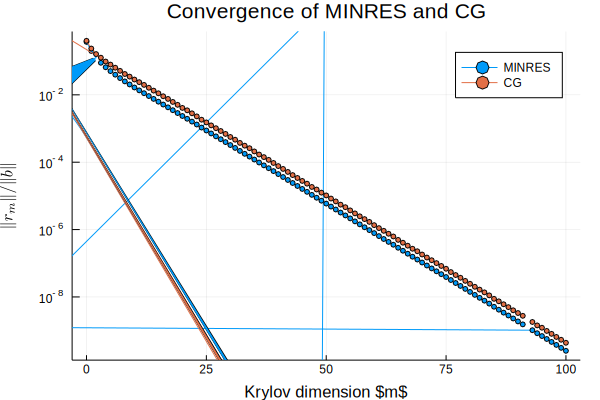

In [3]:
using IterativeSolvers,LinearAlgebra

xMR,histMR = minres(A,b,tol=1e-12,maxiter=101,log=true)
xCG,histCG = cg(A,b,tol=1e-12,maxiter=101,log=true)

using Plots,LaTeXStrings
plot(0:100,[histMR[:resnorm] histCG[:resnorm]]/norm(b),m=(2,:o),label=["MINRES" "CG"], 
    title="Convergence of MINRES and CG",
    xaxis=("Krylov dimension \$m\$"), yaxis=(:log10,L"\|r_m\| / \|b\|") )

There is virtually no difference between the two methods here when measuring the residual. We see little difference in the errors as well. 

In [4]:
@show errorMR = norm( xMR - x ) / norm(x);
@show errorCG = norm( xCG - x) / norm(x);

errorMR = norm(xMR - x) / norm(x) = 3.656711579917621e-9
errorCG = norm(xCG - x) / norm(x) = 2.3469443857919185e-9


Next we use a system matrix whose condition number is $10^4$. 

In [5]:
A = FNC.sprandsym(n,density,1e-4);

Now we find that the CG residual jumps unexpectedly, but overall both methods converge at about the same linear rate. Note from the scales that both methods have actually made very little progress after 100 iterations, though. 

In [6]:
using IterativeSolvers,LinearAlgebra

xMR,histMR = minres(A,b,tol=1e-12,maxiter=101,log=true)
xCG,histCG = cg(A,b,tol=1e-12,maxiter=101,log=true)

using Plots,LaTeXStrings
plot(0:100,[histMR[:resnorm] histCG[:resnorm]]/norm(b),m=(2,:o),label=["MINRES" "CG"], 
    title="Convergence of MINRES and CG",
    xaxis=("Krylov dimension \$m\$"), yaxis=(:log10,L"\|r_m\| / \|b\|") )

The errors confirm that we are nowhere near the correct solution in either case.

In [7]:
@show errorMR = norm( xMR - x ) / norm(x);
@show errorCG = norm( xCG - x) / norm(x);

errorMR = norm(xMR - x) / norm(x) = 202.5449099128998
errorCG = norm(xCG - x) / norm(x) = 814.6542282988149
